<a href="https://colab.research.google.com/github/eggtgg/bt_minhtriho_all/blob/main/hoctangcuong/th-25.4.2024/th_25_4_2024_HoMinhTri.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
random

<module 'random' from '/usr/lib/python3.10/random.py'>

In [ ]:
import sys
np.set_printoptions(threshold=sys.maxsize)

In [ ]:
V = np.zeros((3,4))

In [ ]:
V
lock = [(1,1)]


done = lock + [(0,3),(1,3)]

In [ ]:
reward = 0

In [ ]:
for l in lock:
  V[l] = -100

In [ ]:
V[0,3]= 1
V[1,3] = -1
gamma = 0.9

In [ ]:
print(V)

[[   0.    0.    0.    1.]
 [   0. -100.    0.   -1.]
 [   0.    0.    0.    0.]]


In [ ]:
def find_move(x,y, shape_v):
  up = (x-1, y)
  down = (x+1, y)
  left = (x, y-1)
  right = (x, y+1)

  list_move = [up, down, left, right]

  true_list_move = []
  for move in list_move:
    for stt,i in enumerate(move):
      if i < 0:
        break
      elif i >= shape_v[stt]:
        break
      if stt:
        true_list_move.append(move)
  for l in lock:
    if l in true_list_move:
      true_list_move.remove(l)
  return true_list_move

In [ ]:
moves = find_move(0,7, V.shape)

In [ ]:
moves

[]

In [ ]:
for l in lock:
  if l in moves:
    moves.remove(l)

In [ ]:
moves

[]

In [ ]:
moves_02 = find_move(0,2, V.shape)

In [ ]:
moves_02

[(1, 2), (0, 1), (0, 3)]

In [ ]:
def other_points(input_value, list_point):
    list_a = []
    if input_value in list_point:
        for item in list_point:
            if item != input_value:
                list_a.append(item)
    else:
        print("Giá trị nhập không hợp lệ.")
    return list_a

In [ ]:
def update_value(moves):
  value_range = []
  for move in moves:
    position_other_points = other_points(move,moves)
    sum_other_points = 0
    for position in position_other_points:
      point = V[position]
      sum_other_points+=point
    if (len(moves)-1):
      value = 0.8*(reward + gamma*V[move])+(0.2/(len(moves)-1))*(2*reward + gamma*sum_other_points)
      value_range.append(value)
    else:
      value = reward + gamma*V[move]
      value_range.append(value)
  return max(value_range)

In [ ]:
for stt in range(30):
  print(f"lần lặp: {stt+1}")
  for i, row in enumerate(V):
    #print(i)
    for j, _ in enumerate(row):
      if (i,j) not in done:
        moves = find_move(i,j, V.shape)
        V[i,j] = update_value(moves)
  rounded_array = np.round(V, 4)
  np.set_printoptions(suppress=True)

  display(pd.DataFrame(rounded_array))

lần lặp: 1


,0,1,2,3
0,0.0,0.0,0.7200,1.0000
1,0.0,-100.0,0.4284,-1.0000
2,0.0,0.0,0.3084,0.0421


lần lặp: 2


,0,1,2,3
0,0.0,0.5184,0.8052,1.0000
1,0.0,-100.0000,0.5175,-1.0000
2,0.0,0.2221,0.3964,0.1054


lần lặp: 3


,0,1,2,3
0,0.3732,0.6469,0.8248,1.0000
1,0.2687,-100.0000,0.5395,-1.0000
2,0.2335,0.3274,0.4274,0.1277


lần lặp: 4


,0,1,2,3
0,0.5142,0.6864,0.8303,1.0000
1,0.4122,-100.0000,0.5463,-1.0000
2,0.3557,0.3718,0.4383,0.1356


lần lặp: 5


,0,1,2,3
0,0.5684,0.7002,0.8322,1.0000
1,0.4733,-100.0000,0.5486,-1.0000
2,0.4077,0.3890,0.4422,0.1384


lần lặp: 6


,0,1,2,3
0,0.5893,0.7052,0.8328,1.0000
1,0.4977,-100.0000,0.5494,-1.0000
2,0.4283,0.3955,0.4437,0.1394


lần lặp: 7


,0,1,2,3
0,0.5974,0.7072,0.8331,1.0000
1,0.5072,-100.0000,0.5498,-1.0000
2,0.4364,0.3980,0.4442,0.1398


lần lặp: 8


,0,1,2,3
0,0.6005,0.7079,0.8332,1.00
1,0.5109,-100.0000,0.5499,-1.00
2,0.4395,0.3989,0.4444,0.14


lần lặp: 9


,0,1,2,3
0,0.6017,0.7082,0.8332,1.00
1,0.5123,-100.0000,0.5499,-1.00
2,0.4407,0.3993,0.4445,0.14


lần lặp: 10


,0,1,2,3
0,0.6021,0.7083,0.8332,1.00
1,0.5128,-100.0000,0.5499,-1.00
2,0.4411,0.3994,0.4445,0.14


lần lặp: 11


,0,1,2,3
0,0.6023,0.7083,0.8332,1.0000
1,0.5130,-100.0000,0.5499,-1.0000
2,0.4413,0.3995,0.4445,0.1401


lần lặp: 12


,0,1,2,3
0,0.6024,0.7084,0.8332,1.0000
1,0.5131,-100.0000,0.5499,-1.0000
2,0.4414,0.3995,0.4445,0.1401


lần lặp: 13


,0,1,2,3
0,0.6024,0.7084,0.8332,1.0000
1,0.5132,-100.0000,0.5499,-1.0000
2,0.4414,0.3995,0.4445,0.1401


lần lặp: 14


,0,1,2,3
0,0.6024,0.7084,0.8332,1.0000
1,0.5132,-100.0000,0.5499,-1.0000
2,0.4414,0.3995,0.4445,0.1401


lần lặp: 15


,0,1,2,3
0,0.6024,0.7084,0.8332,1.0000
1,0.5132,-100.0000,0.5499,-1.0000
2,0.4414,0.3995,0.4445,0.1401


lần lặp: 16


,0,1,2,3
0,0.6024,0.7084,0.8332,1.0000
1,0.5132,-100.0000,0.5499,-1.0000
2,0.4414,0.3995,0.4445,0.1401


lần lặp: 17


,0,1,2,3
0,0.6024,0.7084,0.8332,1.0000
1,0.5132,-100.0000,0.5499,-1.0000
2,0.4414,0.3995,0.4445,0.1401


lần lặp: 18


,0,1,2,3
0,0.6024,0.7084,0.8332,1.0000
1,0.5132,-100.0000,0.5499,-1.0000
2,0.4414,0.3995,0.4445,0.1401


lần lặp: 19


,0,1,2,3
0,0.6024,0.7084,0.8332,1.0000
1,0.5132,-100.0000,0.5499,-1.0000
2,0.4414,0.3995,0.4445,0.1401


lần lặp: 20


,0,1,2,3
0,0.6024,0.7084,0.8332,1.0000
1,0.5132,-100.0000,0.5499,-1.0000
2,0.4414,0.3995,0.4445,0.1401


lần lặp: 21


,0,1,2,3
0,0.6024,0.7084,0.8332,1.0000
1,0.5132,-100.0000,0.5499,-1.0000
2,0.4414,0.3995,0.4445,0.1401


lần lặp: 22


,0,1,2,3
0,0.6024,0.7084,0.8332,1.0000
1,0.5132,-100.0000,0.5499,-1.0000
2,0.4414,0.3995,0.4445,0.1401


lần lặp: 23


,0,1,2,3
0,0.6024,0.7084,0.8332,1.0000
1,0.5132,-100.0000,0.5499,-1.0000
2,0.4414,0.3995,0.4445,0.1401


lần lặp: 24


,0,1,2,3
0,0.6024,0.7084,0.8332,1.0000
1,0.5132,-100.0000,0.5499,-1.0000
2,0.4414,0.3995,0.4445,0.1401


lần lặp: 25


,0,1,2,3
0,0.6024,0.7084,0.8332,1.0000
1,0.5132,-100.0000,0.5499,-1.0000
2,0.4414,0.3995,0.4445,0.1401


lần lặp: 26


,0,1,2,3
0,0.6024,0.7084,0.8332,1.0000
1,0.5132,-100.0000,0.5499,-1.0000
2,0.4414,0.3995,0.4445,0.1401


lần lặp: 27


,0,1,2,3
0,0.6024,0.7084,0.8332,1.0000
1,0.5132,-100.0000,0.5499,-1.0000
2,0.4414,0.3995,0.4445,0.1401


lần lặp: 28


,0,1,2,3
0,0.6024,0.7084,0.8332,1.0000
1,0.5132,-100.0000,0.5499,-1.0000
2,0.4414,0.3995,0.4445,0.1401


lần lặp: 29


,0,1,2,3
0,0.6024,0.7084,0.8332,1.0000
1,0.5132,-100.0000,0.5499,-1.0000
2,0.4414,0.3995,0.4445,0.1401


lần lặp: 30


,0,1,2,3
0,0.6024,0.7084,0.8332,1.0000
1,0.5132,-100.0000,0.5499,-1.0000
2,0.4414,0.3995,0.4445,0.1401


In [ ]:
go_array = np.round(V, 4)

In [ ]:
V

array([[   0.60239931,    0.7083708 ,    0.8332485 ,    1.        ],
       [   0.51317963, -100.        ,    0.54994588,   -1.        ],
       [   0.44140074,    0.39950779,    0.44452174,    0.14005565]])

In [ ]:
df_go_array = pd.DataFrame(go_array)

In [ ]:
def find_best_move(moves, array):
  max_value = -101
  for move in moves:
    value = array[move]
    if value > max_value:
      max_value= value
      best_move = move
  return best_move

In [ ]:
def compare_move(p, move):
  if p[0] == move[0]:
    if p[1] == move[1]-1:
      way = ">"
    else:
      way = "<"
  elif p[1] == move[1]:
    if p[0] == move[0]-1:
      way = "v"
    else:
      way = "^"
  return way

In [ ]:
for i, row in enumerate(V):
  #print(i)
  for j, _ in enumerate(row):
    if (i,j) not in done:
      moves = find_move(i,j, V.shape)
      best_move = find_best_move(moves, go_array)
      way = compare_move((i,j),best_move)
      df_go_array.iloc[i, j] = way

In [ ]:
df_go_array

,0,1,2,3
0,>,>,>,1.0
1,^,-100.0,^,-1.0
2,^,>,^,<


In [ ]:
import random
import numpy as np
import pandas as pd

In [ ]:
class TomAndJerry:
    def __init__(self, tom_position, shape_V):
        self.tom_position = tom_position
        self.shape_V = shape_V
        self.x_tom, self.y_tom = tom_position


    # def tom_move(self, way):
    #     if way == "up":
    #         tom_position = (tom_position[0]-1, tom_position[1])
    #     elif way == "down":
    #         tom_position = (tom_position[0]+1, tom_position[1])
    #     elif way == "left":
    #         tom_position = (tom_position[0], tom_position[1]-1)
    #     elif way == "right":
    #         tom_position = (tom_position[0], tom_position[1]+1)

    def tom_find_move(self, x_tom,y_tom, shape_v):
        up = (x_tom-1, y_tom)
        down = (x_tom+1, y_tom)
        left = (x_tom, y_tom-1)
        right = (x_tom, y_tom+1)

        list_move = [up, down, left, right]

        true_list_move = []
        for move in list_move:
          for stt,i in enumerate(move):
            if i < 0:
              break
            elif i >= shape_v[stt]:
              break
            if stt:
              true_list_move.append(move)
        for l in lock:
          if l in true_list_move:
            true_list_move.remove(l)
        return true_list_move

    def tom_random_move(self, x_tom,y_tom, shape_v):
        return random.choice(self.tom_find_move(x_tom,y_tom, shape_v))




In [ ]:
class Game:
    def __init__(self, x, y):
        self.x = x
        self.y = y
        self.grid =  np.zeros((x, y))
        self.tom = (0,2)
        self.spike = (1,3)
        self.jerry = (0,3)
        self.wall = [(1,1)]
        self.done = self.wall + [self.spike, self.jerry]

        self.grid[self.spike] = -1
        self.grid[self.jerry] = 1

        self.reward = 0
        self.gamma = 0.9
        for w in self.wall:
          self.grid[w] = -100


    def find_move(self, x_tom, y_tom, grid):
        up = (x_tom-1, y_tom)
        down = (x_tom+1, y_tom)
        left = (x_tom, y_tom-1)
        right = (x_tom, y_tom+1)

        list_move = [up, down, left, right]

        true_list_move = []
        for move in list_move:
          for stt,i in enumerate(move):
            if i < 0:
              break
            elif i >= (self.x, self.y)[stt]:
              break
            if stt:
              true_list_move.append(move)
        for w in self.wall:
          if w in true_list_move:
            true_list_move.remove(w)
        return true_list_move


    def random_move(self, true_list_move):
        self.tom = random.choice(true_list_move)
        print(f"tom đã đến ô {self.tom}")


    def other_points(self, input_value, list_point):
        list_a = []
        if input_value in list_point:
            for item in list_point:
                if item != input_value:
                    list_a.append(item)
        else:
            print("Giá trị nhập không hợp lệ.")
        return list_a


    def update_value(self, moves):
        value_range = []
        for move in moves:
            position_other_points = self.other_points(move,moves)
            #print(f"đây: {position_other_points}")
            sum_other_points = 0
            for position in position_other_points:
                point = self.grid[position]
                sum_other_points+=point
            if (len(moves)-1):
                  value = 0.8*(self.reward + self.gamma*self.grid[move])+(0.2/(len(moves)-1))*(2*self.reward + self.gamma*sum_other_points)
                  value_range.append(value)
            else:
                  value = self.reward + self.gamma*self.grid[move]
                  value_range.append(value)
            #print(value_range)
        return max(value_range)


    def loop_update(self, times = 30):
        for stt in range(times):
            print(f"lần lặp: {stt+1}")
            for i, row in enumerate(self.grid):
              #print(i)
              for j, _ in enumerate(row):
                if (i,j) not in self.done:
                  moves = self.find_move(i,j, self.grid.shape)
                  self.grid[i,j] = self.update_value(moves)
            rounded_array = np.round(self.grid, 4)
            np.set_printoptions(suppress=True)

            display(pd.DataFrame(rounded_array))


    def show_map(self):
        map = np.zeros((self.x, self.y))
        map[self.spike] = -1
        map[self.jerry] = 1
        for w in self.wall:
           map[w] = -100
        display(pd.DataFrame(map))


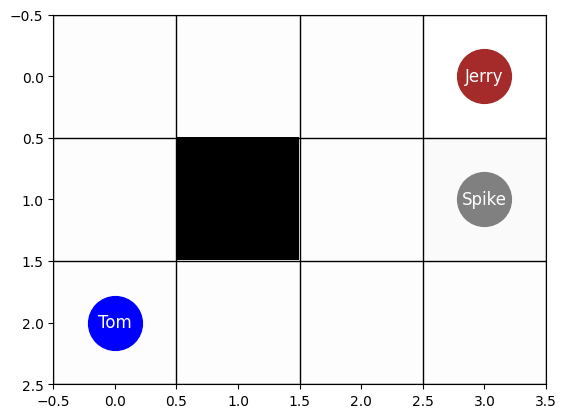

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Mảng mới của bạn
game_map_new = np.array([[0, 0, 0, 1],
                         [0, -100, 0, -1],
                         [0, 0, 0, 0]])


rows, cols = np.where(game_map_new == 1)
for row, col in zip(rows, cols):
    plt.text(col, row, "Jerry", ha='center', va='center', color='white', fontsize=12)
    plt.scatter(col, row, color='brown', s = 1500)


rows_spike, cols_spike = np.where(game_map_new == -1)

for row, col in zip(rows_spike, cols_spike):
    plt.text(col, row, "Spike", ha='center', va='center', color='white', fontsize=12)
    plt.scatter(col, row, color='gray', s = 1500)

for row, col in zip([a.tom[1]], [a.tom[0]]):
    plt.text(col, row, "Tom", ha='center', va='center', color='white', fontsize=12)
    plt.scatter(col, row, color='blue', s = 1500)

# Biểu diễn mảng mới bằng màu sắc xám và trắng
plt.imshow(game_map_new, cmap='gray', interpolation='nearest')

# Thêm chú thích
#plt.colorbar(label='Giá trị')

# Vẽ lưới
for i in range(game_map_new.shape[0] + 1):
    plt.axhline(i - 0.5, color='black', lw=1)

for j in range(game_map_new.shape[1] + 1):
    plt.axvline(j - 0.5, color='black', lw=1)

# Hiển thị
plt.show()



In [ ]:
a.tom

(0, 2)

In [ ]:
zip(rows, cols)

In [ ]:
a = Game(3,4)

In [ ]:
a.loop_update()

In [ ]:
a.show_map()

,0,1,2,3
0,0.0,0.0,0.0,1.0
1,0.0,-100.0,0.0,-1.0
2,0.0,0.0,0.0,0.0


In [ ]:
for i, row in enumerate(a.grid):
  for j,_ in enumerate(row):
    if (i,j) in a.done:
      pass
    else:
      moves = a.find_move(i, j, a.grid)
      act = {}
      for move in moves:
        act[compare_move((i,j),move)] = 0
      q[i][j] = act


In [ ]:
df = pd.DataFrame(q)

In [ ]:
df

,0,1,2,3
0,"{'v': 0, '>': 0}","{'<': 0, '>': 0}","{'v': 0, '<': 0, '>': 0}",0
1,"{'^': 0, 'v': 0}",0,"{'^': 0, 'v': 0, '>': 0}",0
2,"{'^': 0, '>': 0}","{'<': 0, '>': 0}","{'^': 0, '<': 0, '>': 0}","{'^': 0, '<': 0}"


In [ ]:
max(q[0][1])

'>'

In [ ]:
max(q[0][1], key = q[0][1].get)

'<'

In [ ]:
def update_q():
  reward + gamma*np.argmax(Q[next_state])
  return 0

{'v': 0, '>': 0}

In [ ]:
np.zeros((3,4)).tolist()

[[0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0]]

In [ ]:
for i, row in enumerate(a.grid):
  for j,_ in enumerate(row):
    print(f"ô {(i, j):}")
    if (i,j) in a.done:

In [ ]:
q = np.zeros((3,4), int).tolist()

In [ ]:
q

[[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]]

In [ ]:
(1,1) in a.done

True

In [ ]:
a.grid

array([[   0.,    0.,    0.,    1.],
       [   0., -100.,    0.,   -1.],
       [   0.,    0.,    0.,    0.]])

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [ ]:
true_list_move = a.find_move(2,0, a.grid)
a.random_move(true_list_move)

tom đã đến ô (2, 1)
